In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import PIL

2024-02-02 22:29:19.694270: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-02 22:29:19.694463: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-02 22:29:19.864079: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
test_data_dir = '/kaggle/input/bttai-nybg-2024/BTTAIxNYBG-test.csv'
train_data_dir = '/kaggle/input/bttai-nybg-2024/BTTAIxNYBG-train.csv'
validation_data_dir = '/kaggle/input/bttai-nybg-2024/BTTAIxNYBG-validation.csv'

In [3]:
test_img_dir = '/kaggle/input/bttai-nybg-2024/BTTAIxNYBG-test/BTTAIxNYBG-test'
train_img_dir = '/kaggle/input/bttai-nybg-2024/BTTAIxNYBG-train/BTTAIxNYBG-train'
validation_img_dir = '/kaggle/input/bttai-nybg-2024/BTTAIxNYBG-validation/BTTAIxNYBG-validation'

In [4]:
train_df = pd.read_csv(train_data_dir)
test_df = pd.read_csv(test_data_dir)
validation_df = pd.read_csv(validation_data_dir)

In [5]:
train_df.head()

,uniqueID,classLabel,classID,source,imageFile
0,2,occluded-specimens,8,L,a1a8b48e8cb142b3.jpg
1,3,microscope-slides,6,L,79599db2ac9092b6.jpg
2,4,illustrations-color,2,BHL,c449696f2f0d0d92.jpg
3,5,illustrations-color,2,P,80a8f4a393b4e08c.jpg
4,6,animal-specimens,0,AK,041a1c6e73313638.jpg


In [6]:
test_df.head()

,uniqueID,imageFile
0,1,facd4dcd8e869617.jpg
1,9,78c96bb2b2b62579.jpg
2,10,d292d2c4e0e6ad9d.jpg
3,14,3633494929870713.jpg
4,16,dc94b496c8e2d6c4.jpg


In [7]:
validation_df.head()

,uniqueID,classLabel,classID,source,imageFile
0,7,microscope-slides,6,K,f09a8abe9e9e9ef2.jpg
1,20,illustrations-color,2,BHL,a6c6868387c6af8c.jpg
2,37,ordinary-pressed-specimens,9,YU,6062c68e8c34b292.jpg
3,59,animal-specimens,0,CAS,363617271597dfd9.jpg
4,60,biocultural-specimens,1,Met,4218d8d2f42b05e4.jpg


In [8]:
train_df.isnull().sum()

uniqueID      0
classLabel    0
classID       0
source        0
imageFile     0
dtype: int64

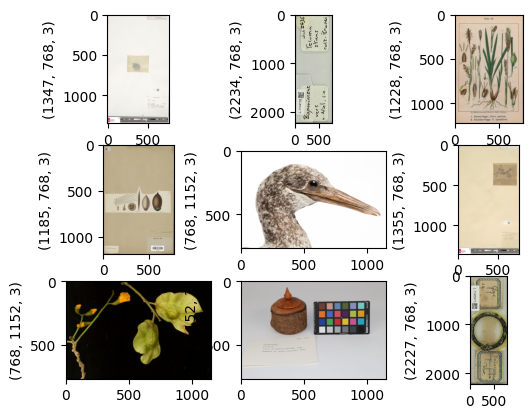

In [9]:
df = pd.DataFrame()
# test to reach image path
for i in range(9):
    plt.subplot(3,3, i + 1)
    filename = train_img_dir + "/" + train_df.loc[i, "imageFile"]
    image = imread(filename)
    plt.ylabel(image.shape)
    plt.imshow(image)
    
plt.show()

In [10]:
classLabels = train_df['classLabel'].unique().tolist()
print("The data has:", len(classLabels), "unique labels\n")
classLabels.sort()
for label in classLabels:
    print(label)

The data has: 10 unique labels

animal-specimens
biocultural-specimens
illustrations-color
illustrations-gray
live-plants
micrographs-transmission-light
microscope-slides
mixed-pressed-specimens
occluded-specimens
ordinary-pressed-specimens


In [11]:
classLabel_counts = train_df['classLabel'].value_counts()

print("Count of each unique class in the 'classLabel' column:")
print(classLabel_counts)

Count of each unique class in the 'classLabel' column:
classLabel
live-plants                       8200
illustrations-color               8196
illustrations-gray                8196
biocultural-specimens             8195
micrographs-transmission-light    8195
occluded-specimens                8194
animal-specimens                  8194
mixed-pressed-specimens           8193
microscope-slides                 8192
ordinary-pressed-specimens        8191
Name: count, dtype: int64


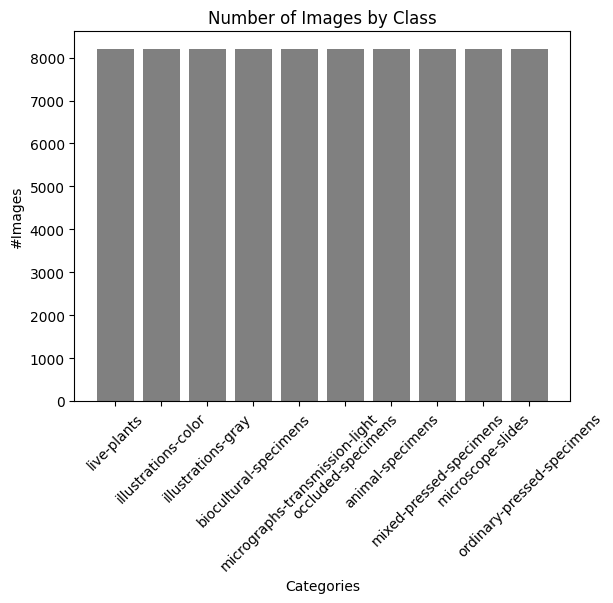

In [12]:

# Plot the counts using Matplotlib
plt.bar(classLabel_counts.index, classLabel_counts.values, color='grey')

plt.xticks(rotation=45)
plt.xlabel('Categories')
plt.ylabel('#Images')
plt.title('Number of Images by Class')
plt.show()

In [13]:
unique_class_ids = train_df['classID'].unique()
unique_class_labels = train_df['classLabel'].unique()
class_id_label_map = dict(zip(unique_class_ids, unique_class_labels))
class_id_label_map

{8: 'occluded-specimens',
 6: 'microscope-slides',
 2: 'illustrations-color',
 0: 'animal-specimens',
 4: 'live-plants',
 1: 'biocultural-specimens',
 3: 'illustrations-gray',
 7: 'mixed-pressed-specimens',
 9: 'ordinary-pressed-specimens',
 5: 'micrographs-transmission-light'}